# Previsão de renda

## Etapa 1 CRISP - DM: Entendimento do negócio

O entendimento do negócio é fundamental para direcionar a análise de dados e alinhar as ações aos objetivos estratégicos. O principal foco deste projeto é explorar e compreender os fatores que influenciam a renda dos clientes, fornecendo insights que possibilitem melhorar a segmentação, personalização de produtos e a gestão de risco financeiro. Para isso, é essencial considerar aspectos como características demográficas, sociais e econômicas, buscando identificar padrões que possam ser utilizados para prever comportamentos e tomar decisões mais informadas.

A análise desta base de dados permitirá compreender como atributos individuais, como idade, gênero, nível de educação, estado civil e tempo de emprego, afetam a renda. Esses fatores são cruciais para segmentar clientes em perfis bem definidos, possibilitando a oferta de produtos personalizados que atendam às suas necessidades e características específicas. Além disso, variáveis como posse de veículo ou imóvel, bem como o tipo de residência, ajudam a identificar clientes com maior ou menor estabilidade financeira, fornecendo uma base sólida para a análise de risco.

Outro aspecto importante é avaliar como fatores sociais, como a quantidade de pessoas na residência, impactam a renda média dos clientes. Isso pode revelar desigualdades ou padrões econômicos associados a diferentes grupos, permitindo que estratégias de mercado sejam ajustadas de forma mais inclusiva e eficiente. Além disso, explorar as possíveis relações entre educação e renda pode destacar a importância de investimentos em qualificação como uma ferramenta de crescimento econômico e financeiro.

Essa análise não apenas apoia a tomada de decisões estratégicas no curto prazo, mas também contribui para o planejamento de longo prazo, ajudando a identificar áreas prioritárias para investimentos, marketing e expansão de serviços. O entendimento claro das correlações entre variáveis como idade, tipo de renda e tempo de emprego permite a construção de modelos preditivos mais robustos, fundamentais para sustentar o crescimento e a sustentabilidade do negócio.


## Etapa 2 Crisp-DM: Entendimento dos dados

A base de dados que utilizamos nessa análise foi concedida pela EBAC durante o curso profissionalizante de Cientista de Dados.


### Dicionário de dados

Segue abaixo uma tabela com a descrição de cada variável e também seus tipos.


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de Referência                               | object  |
| id_cliente              |  Identificação única de cada cliente              | int64   |
| sexo                    |  Gênero (F para feminino, M para masculino)       | object  |
| posse_de_veiculo        |  Indica se possui veículo (True/False)            | bool    |
| posse_de_imovel         |  Classifica se possui ou não imóvel               | bool    |
| qtd_filhos              |  Quantidade de filhos do cliente                  | int64   |
| tipo_renda              |  Fonte da renda do cliente                        | object  |
| educacao                |  Grau de educação formal do cliente               | object  |
| estado_civil            |  Estado civil do cliente                          | object  |
| tipo_residencia         |  Tipo de residência do cliente                    | object  |
| idade                   |  Idade do cliente                                 | int64   |
| tempo_emprego           |  Tempo (anos) em que o cliente está empregado     | float64 |
| qt_pessoas_residencia   |  Quantidade de pessoas na residência do cliente   | int64   |
| renda                   |  Renda total                                      | float64 |





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [3]:
# Manipulação e análise de dados
import pandas as pd
import numpy as np

from ydata_profiling import ProfileReport

# Visualização
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Análise estatística
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Machine Learning e pré-processamento
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Suprimir avisos
import warnings
warnings.filterwarnings('ignore')

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [47]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [48]:
renda.head(1)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.603,1.000,8060.340


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [49]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [50]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# Gerando os metadados do dataset
metadados = (
    renda.dtypes
    .reset_index()
    .rename(columns={"index": "coluna", 0: "dtypes"})
)

metadados['missing'] = renda.isna().sum().values
metadados['perc_missing'] = (metadados['missing'] / len(renda) * 100).round()
metadados['valores_unicos'] = renda.nunique().values

# Exibindo os metadados
print(metadados)

                   coluna   dtypes  missing  perc_missing  valores_unicos
0              Unnamed: 0    int64        0           0.0           15000
1                data_ref   object        0           0.0              15
2              id_cliente    int64        0           0.0            9845
3                    sexo   object        0           0.0               2
4        posse_de_veiculo     bool        0           0.0               2
5         posse_de_imovel     bool        0           0.0               2
6              qtd_filhos    int64        0           0.0               8
7              tipo_renda   object        0           0.0               5
8                educacao   object        0           0.0               5
9            estado_civil   object        0           0.0               5
10        tipo_residencia   object        0           0.0               6
11                  idade    int64        0           0.0              47
12          tempo_emprego  float64    

Análise da distribuição da variável alvo "renda" e suas estatísticas descritivas:

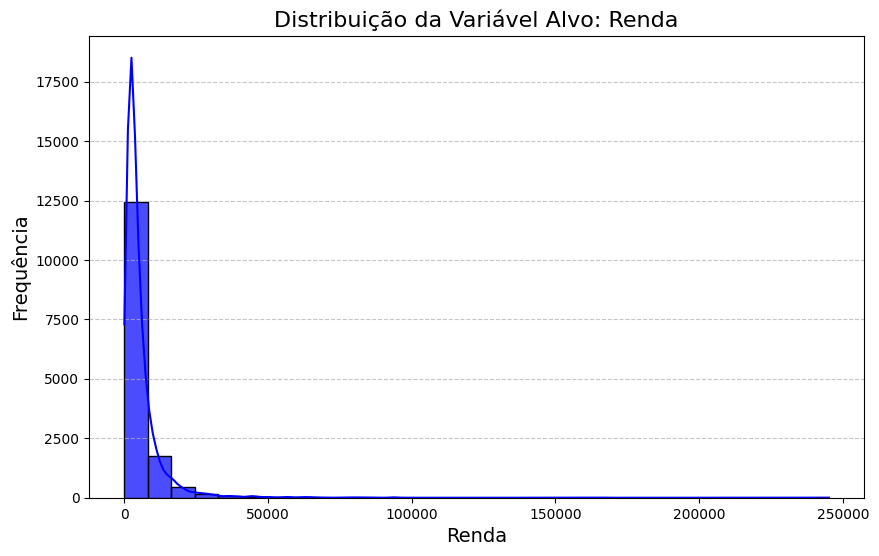

count     15000.000000
mean       5697.287057
std        8266.816289
min         118.710000
25%        2026.110000
50%        3499.720000
75%        6392.167500
max      245141.670000
Name: renda, dtype: float64


In [9]:
# Plotando a distribuição da variável alvo 'renda'
plt.figure(figsize=(10, 6))
sns.histplot(renda['renda'], bins=30, kde=True, color='blue', alpha=0.7)
plt.title('Distribuição da Variável Alvo: Renda', fontsize=16)
plt.xlabel('Renda', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Estatísticas básicas da variável alvo
renda_stats = renda['renda'].describe()

# Exibindo as estatísticas
print(renda_stats)

Aplicar Transformação Logaritmica

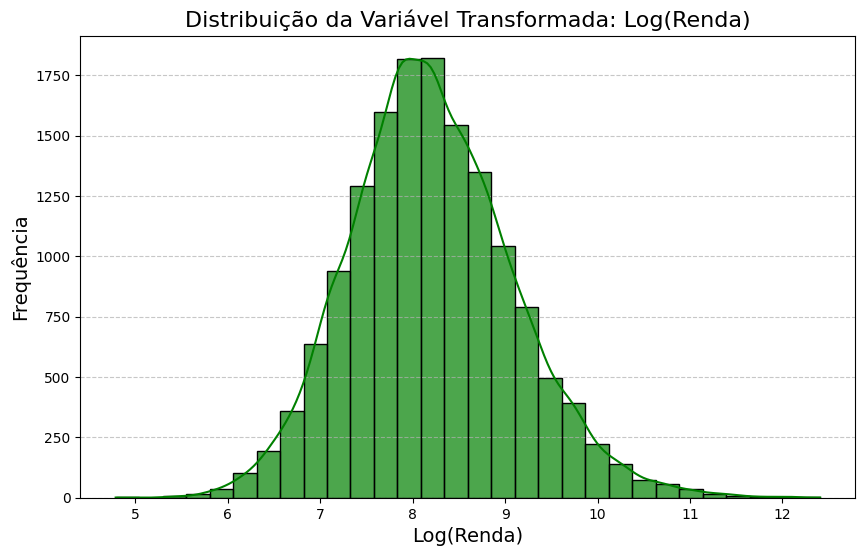

count    15000.000000
mean         8.208665
std          0.883132
min          4.785072
25%          7.614366
50%          8.160724
75%          8.762985
max         12.409596
Name: log_renda, dtype: float64


In [10]:
# Aplicando a transformação logarítmica
renda['log_renda'] = np.log1p(renda['renda'])  # log1p para lidar com valores próximos a zero

# Plotando a distribuição após a transformação
plt.figure(figsize=(10, 6))
sns.histplot(renda['log_renda'], bins=30, kde=True, color='green', alpha=0.7)
plt.title('Distribuição da Variável Transformada: Log(Renda)', fontsize=16)
plt.xlabel('Log(Renda)', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Estatísticas básicas da variável transformada
log_renda_stats = renda['log_renda'].describe()

# Exibindo as estatísticas
print(log_renda_stats)

### Entendimento dos dados - Bivariadas




Para ter uma melhor visualização dos dados, vamos filtrar e definir visualizações das variáveis categóricas e numéricas:

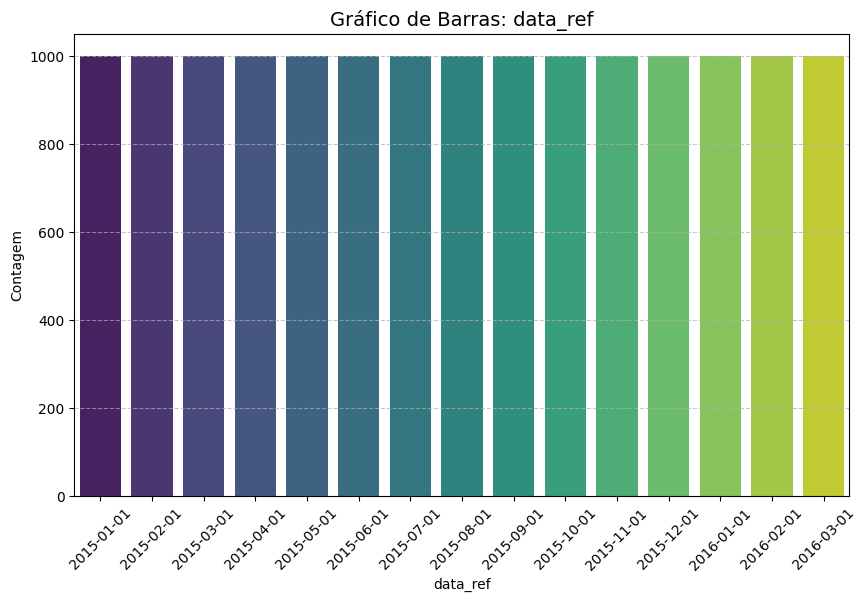

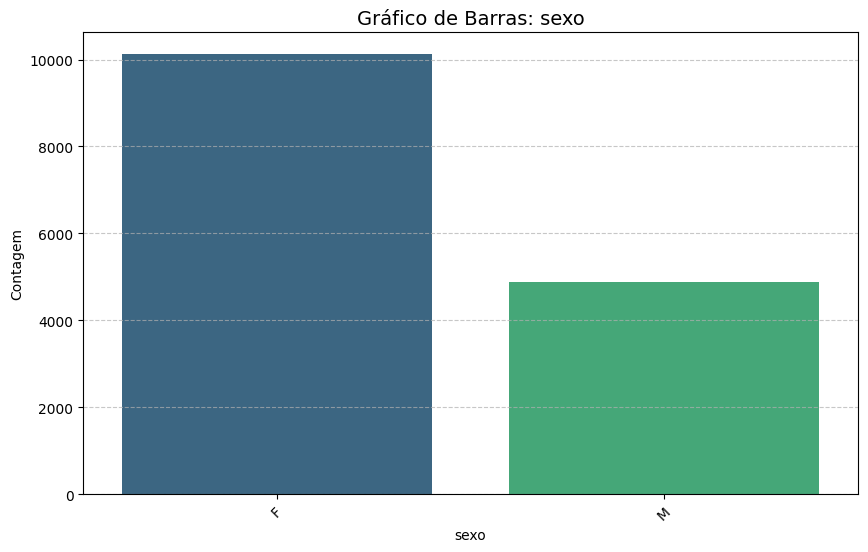

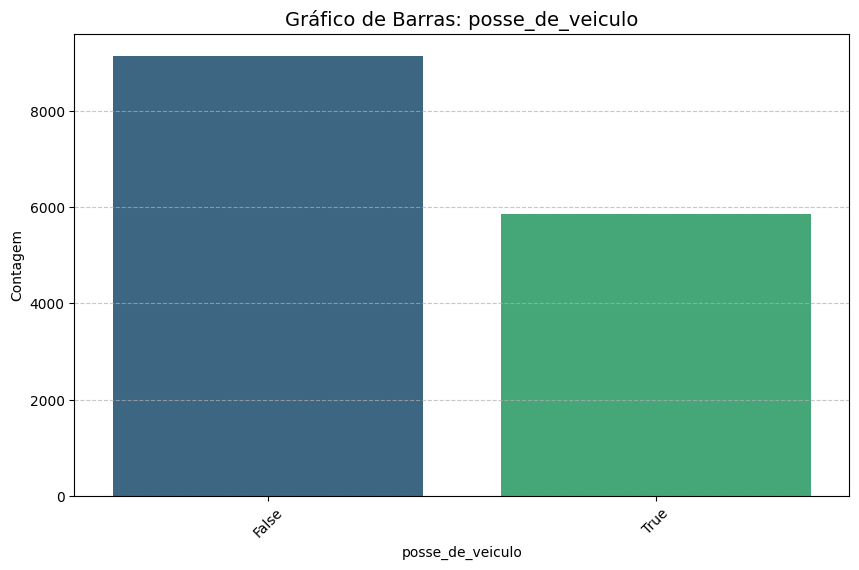

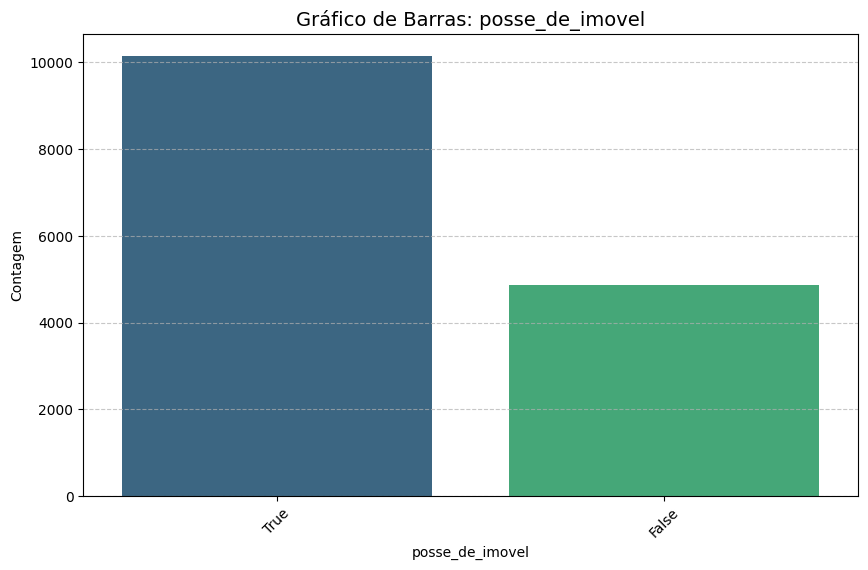

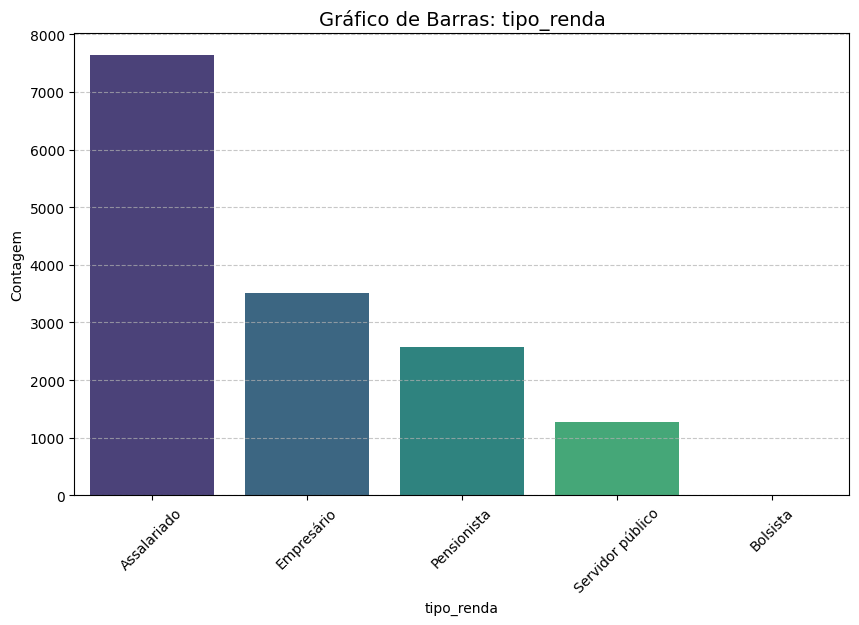

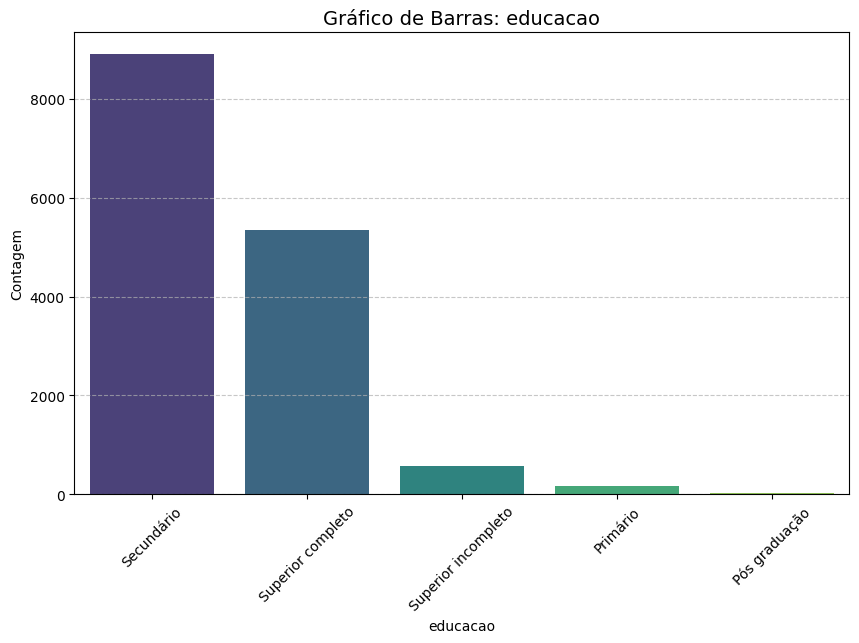

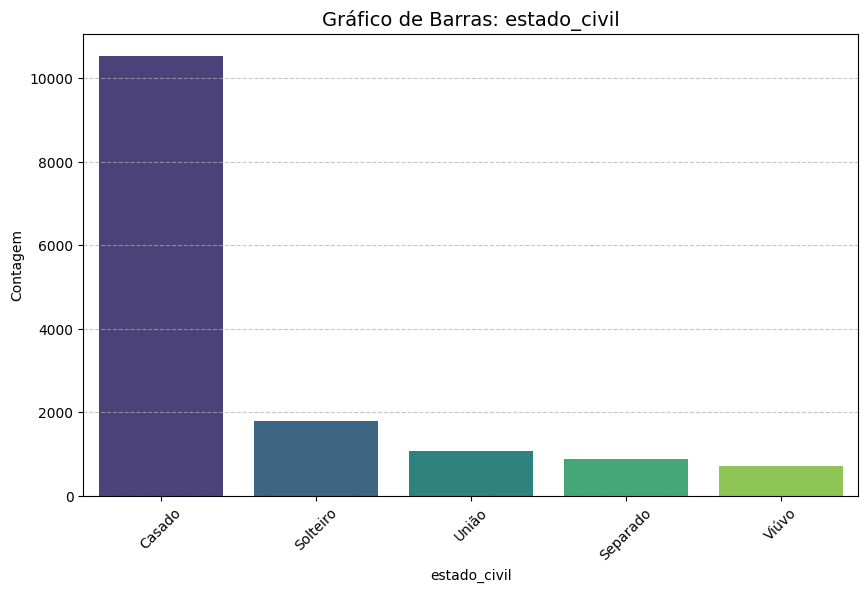

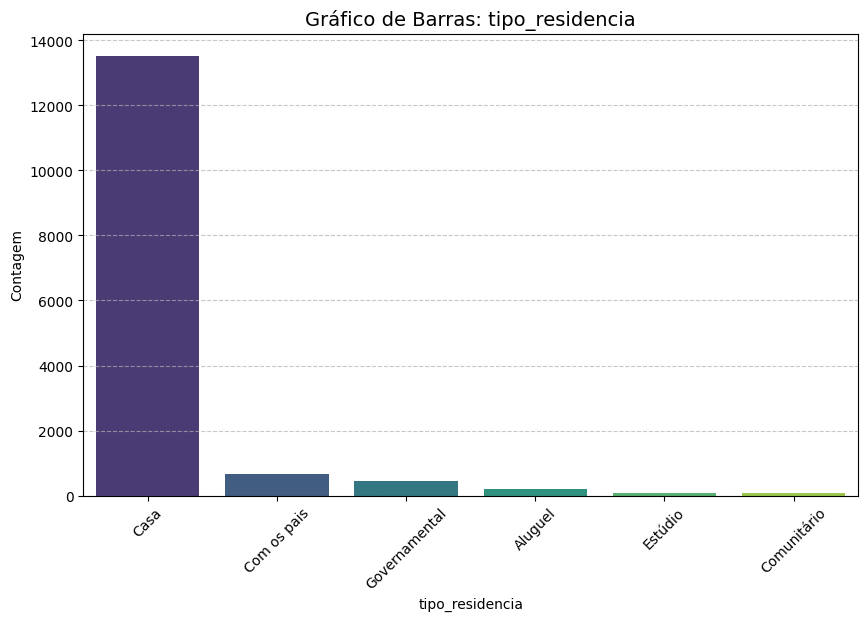

In [11]:
# Selecionando variáveis categóricas
variaveis_categoricas = renda.select_dtypes(include=['object', 'bool']).columns

# Plotando gráficos de barras para variáveis categóricas
for coluna in variaveis_categoricas:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=renda, x=coluna, order=renda[coluna].value_counts().index, palette='viridis')
    plt.title(f'Gráfico de Barras: {coluna}', fontsize=14)
    plt.xlabel(coluna)
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

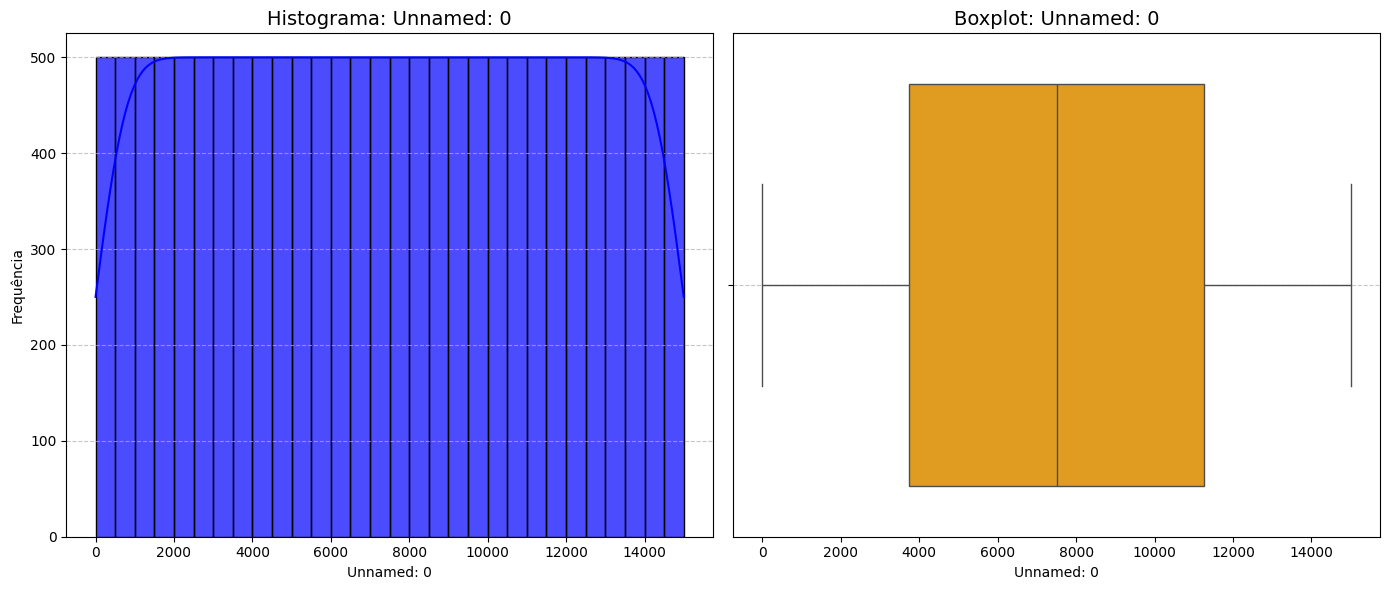

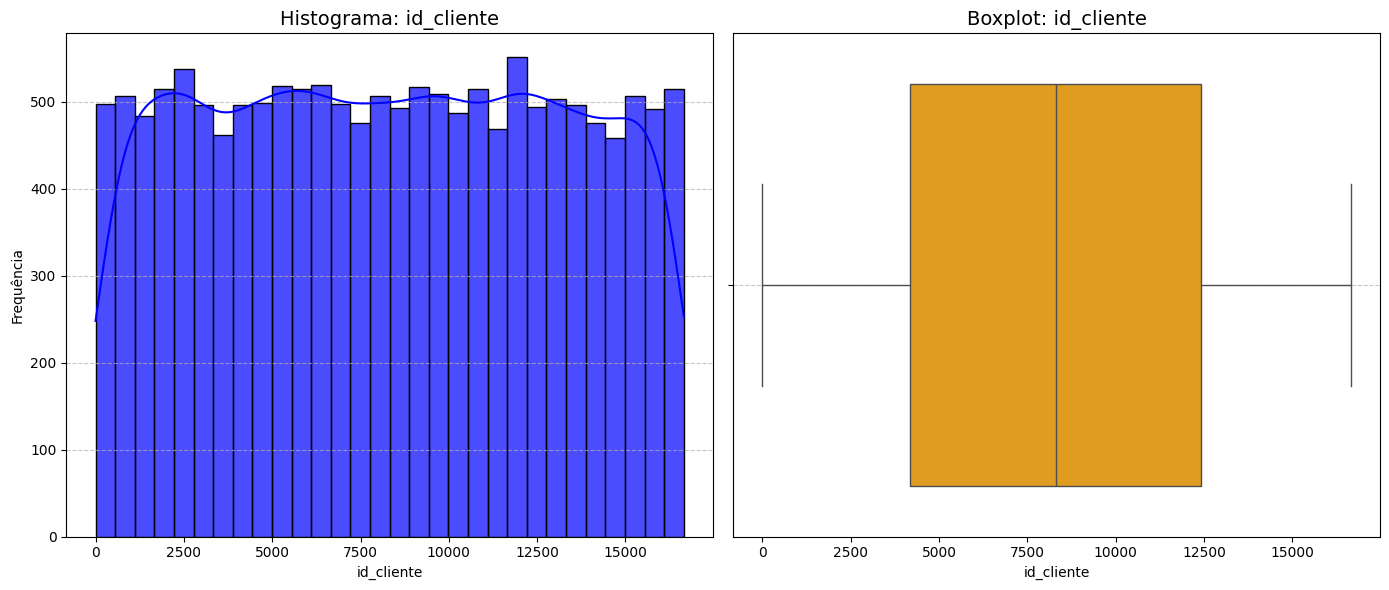

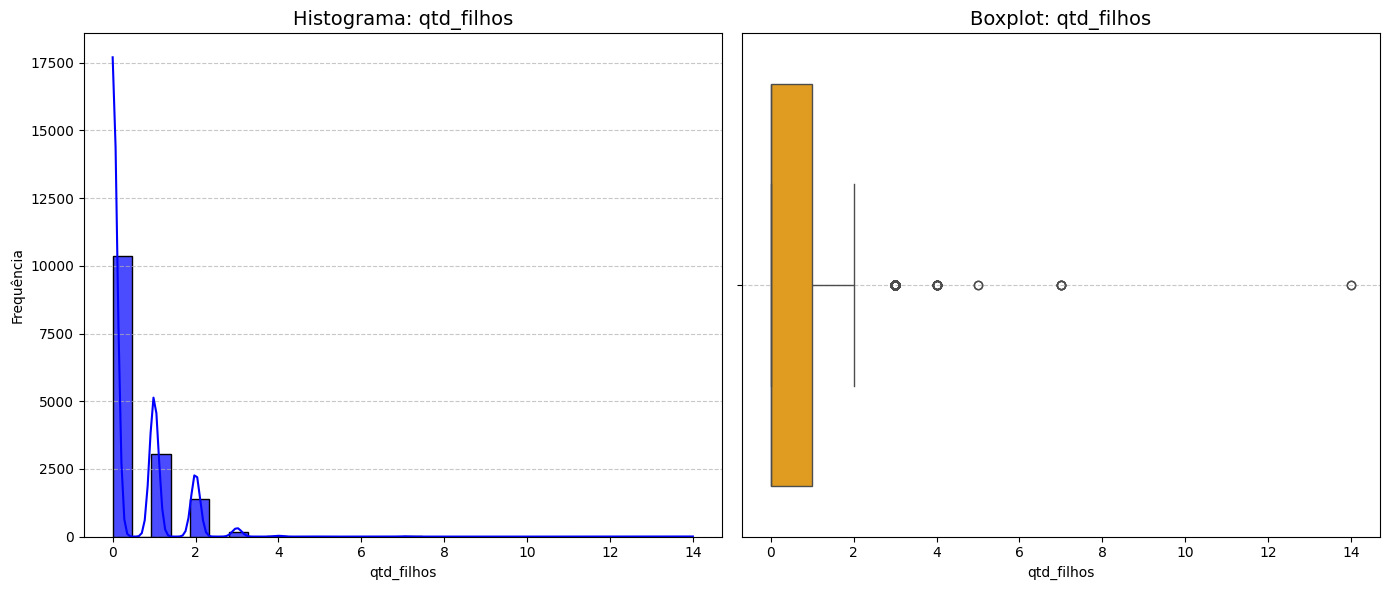

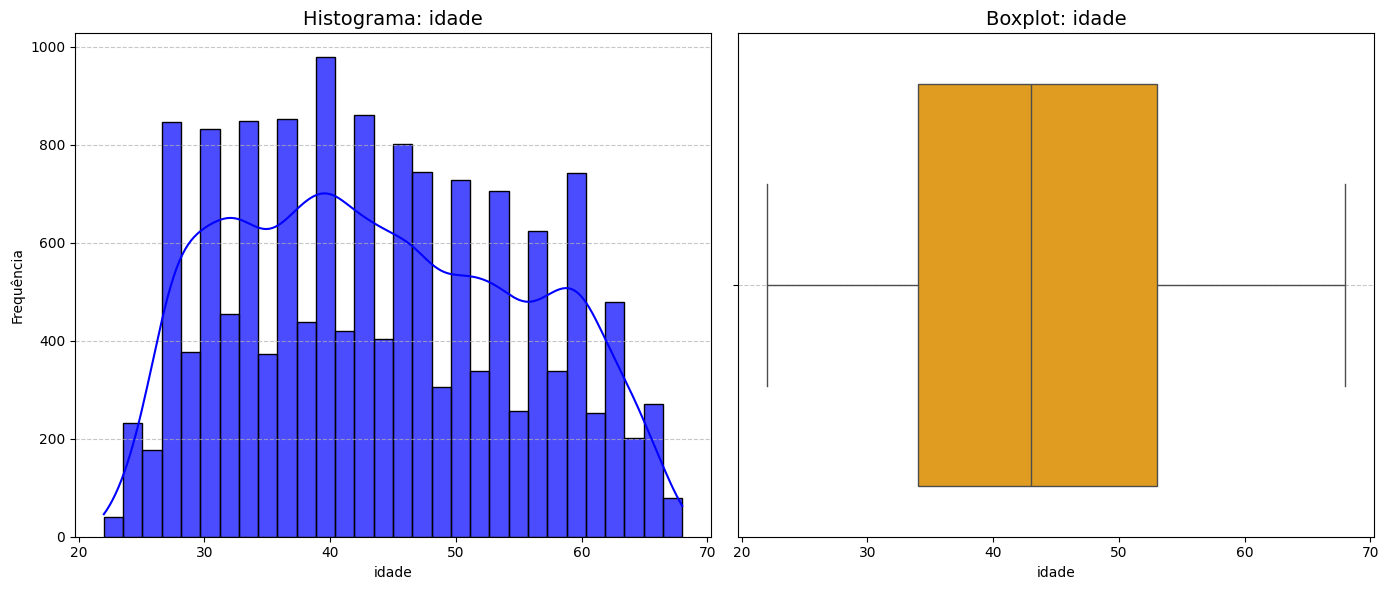

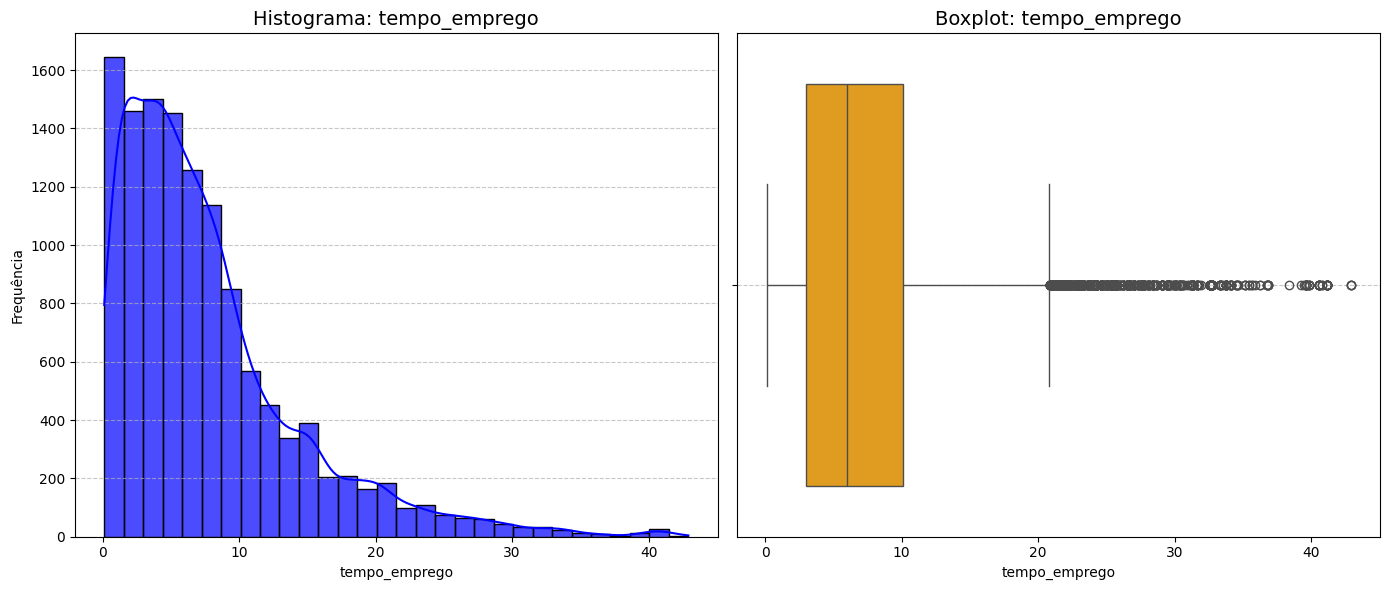

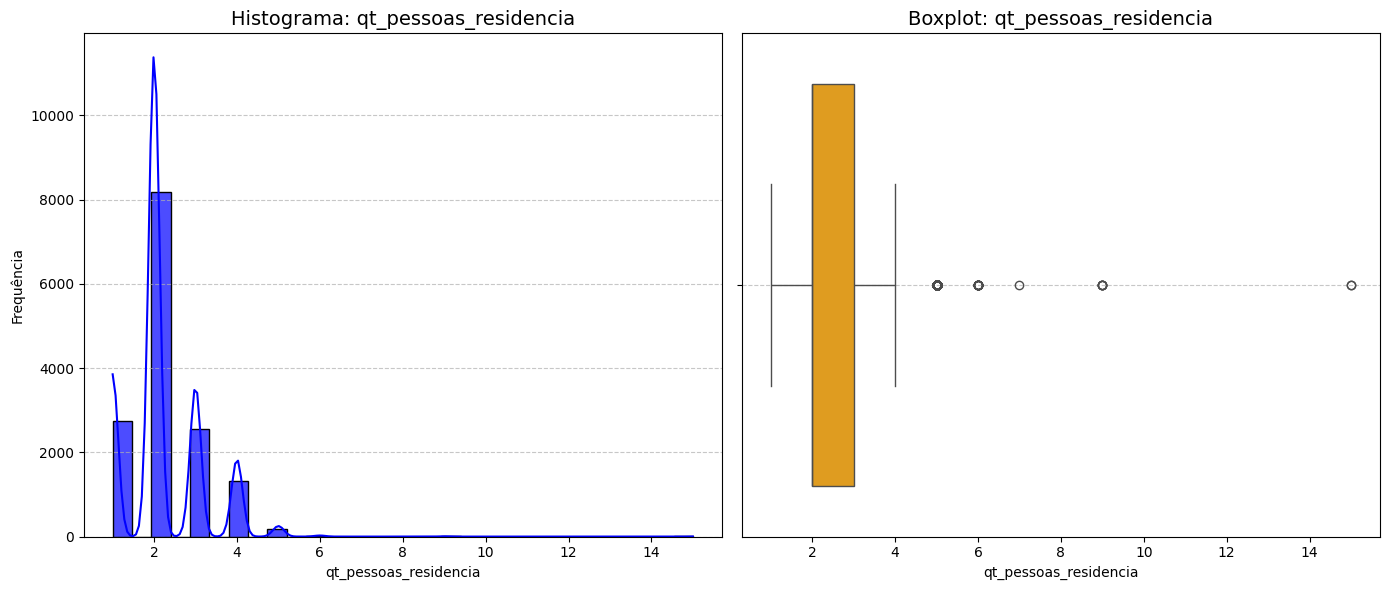

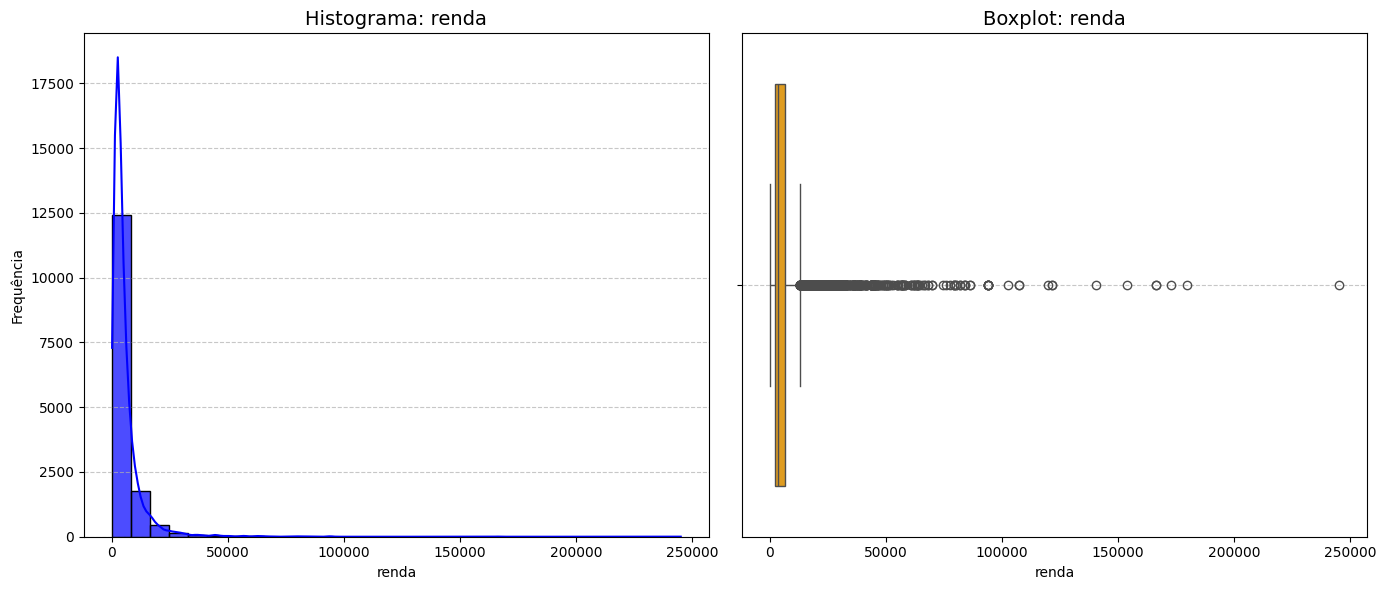

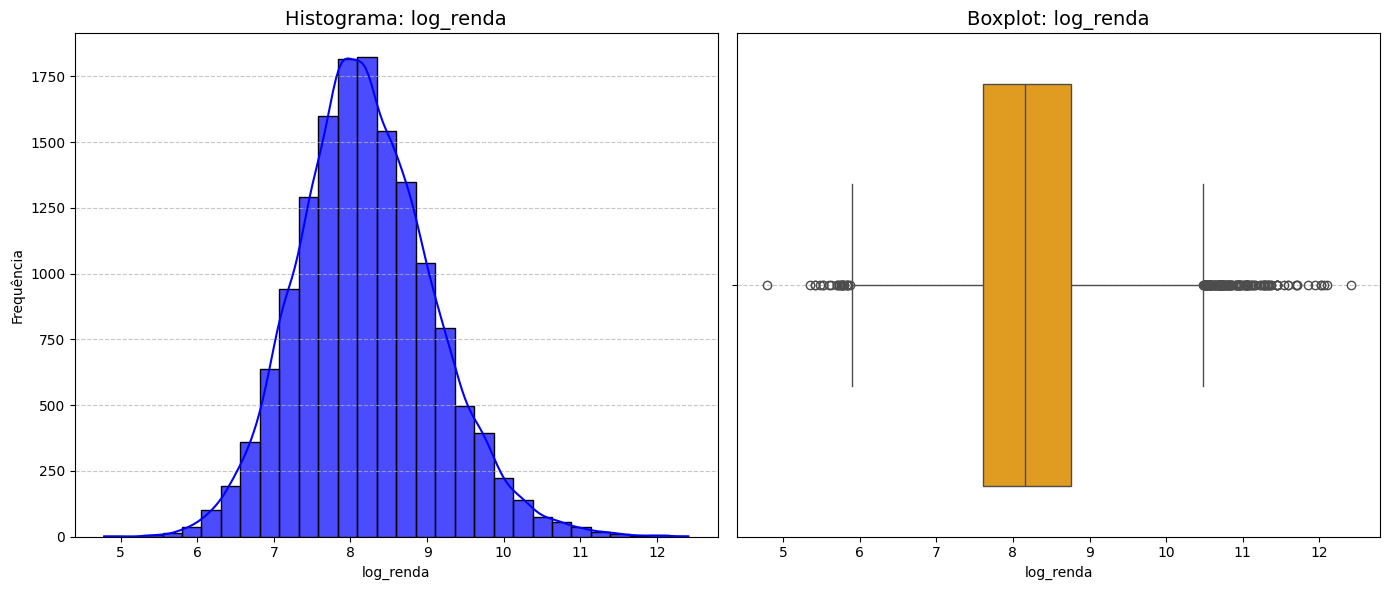

In [12]:
# Selecionando variáveis numéricas
variaveis_numericas = renda.select_dtypes(include=['int64', 'float64']).columns

# Plotando histogramas e boxplots para variáveis numéricas
for coluna in variaveis_numericas:
    plt.figure(figsize=(14, 6))
    
    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(renda[coluna], bins=30, kde=True, color='blue', alpha=0.7)
    plt.title(f'Histograma: {coluna}', fontsize=14)
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=renda[coluna], color='orange')
    plt.title(f'Boxplot: {coluna}', fontsize=14)
    plt.xlabel(coluna)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()


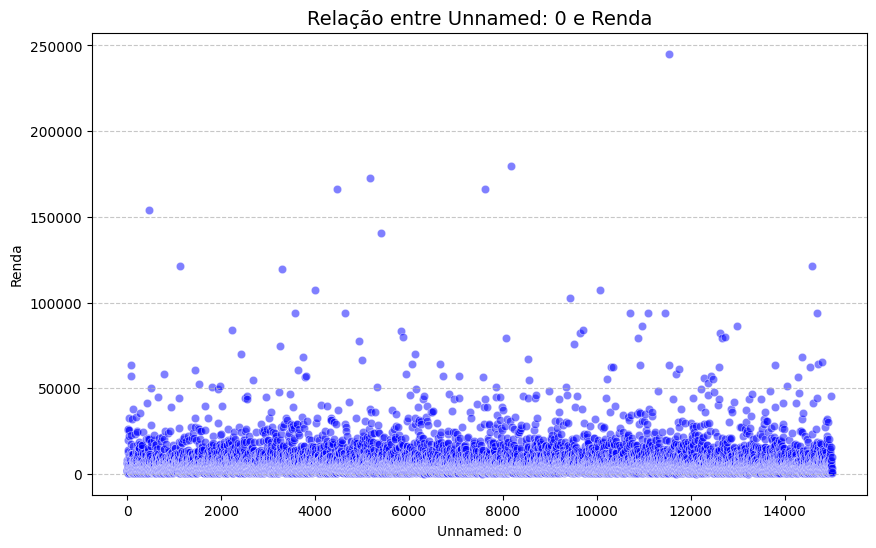

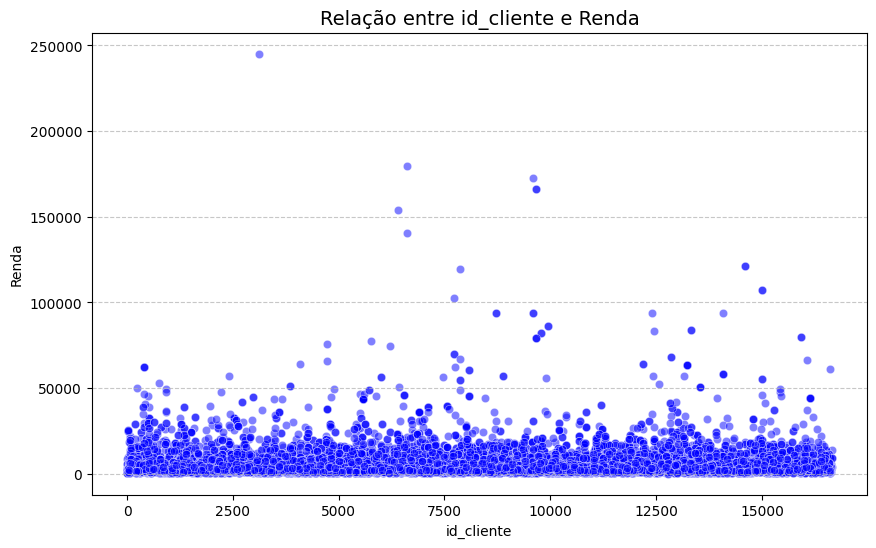

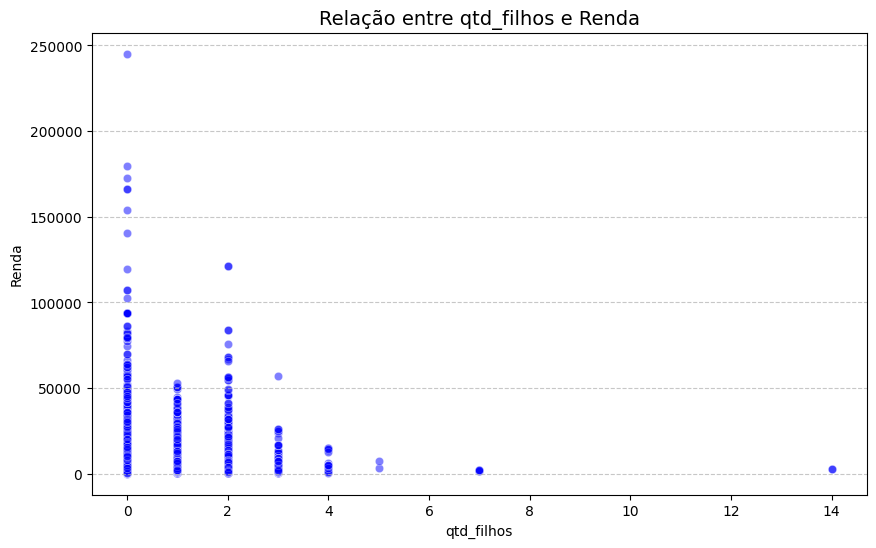

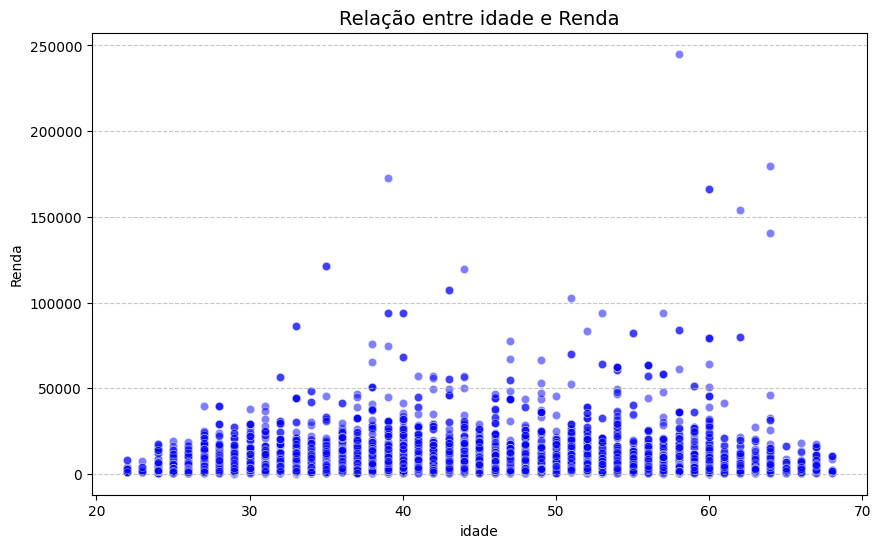

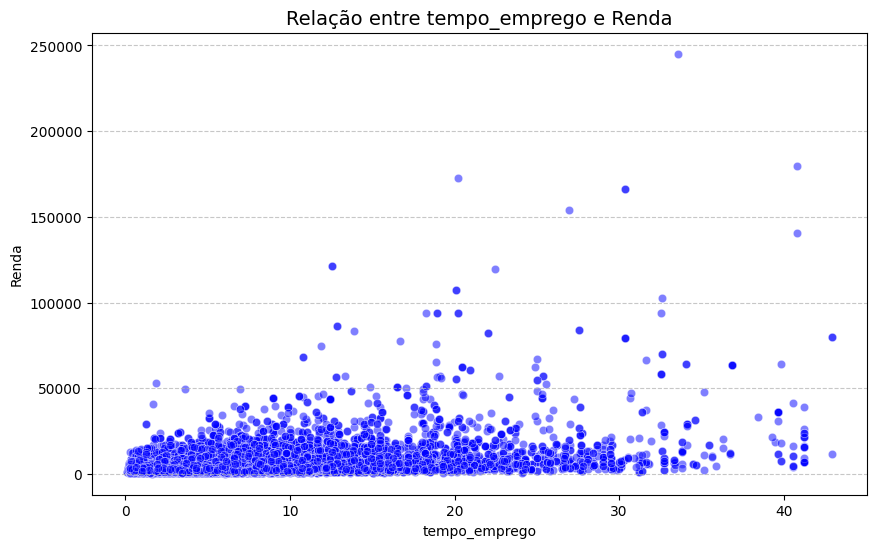

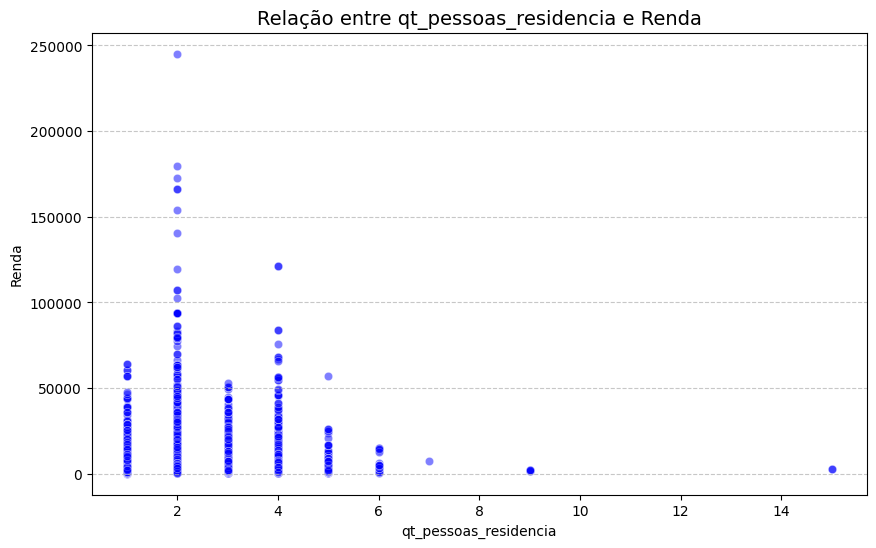

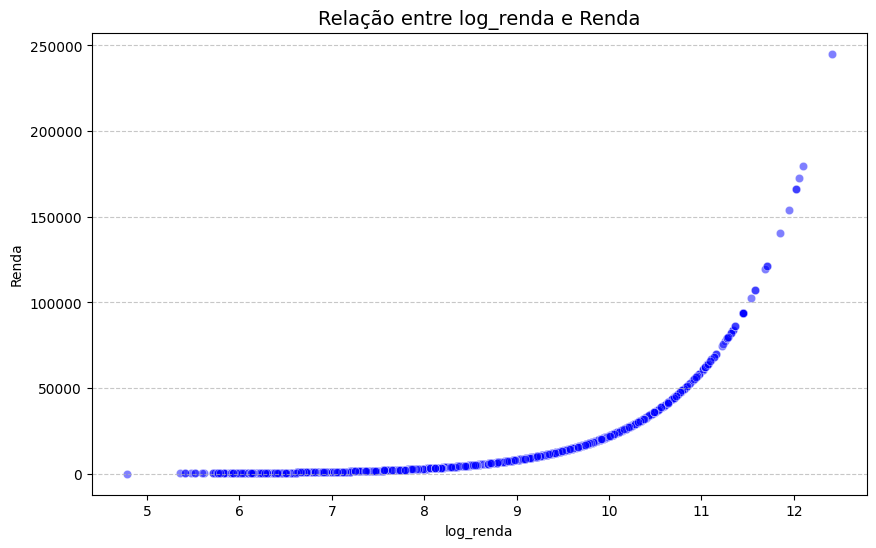

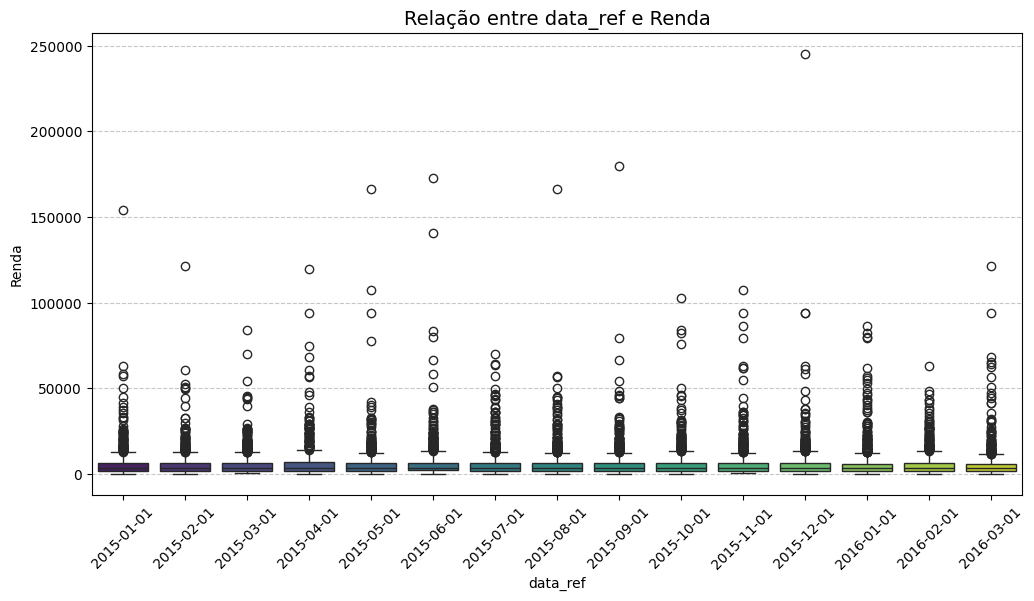

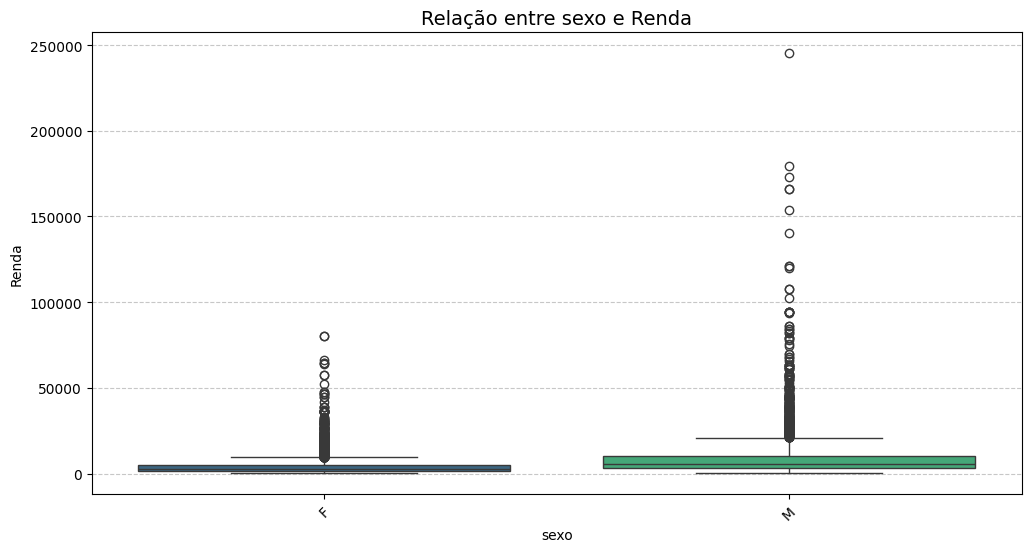

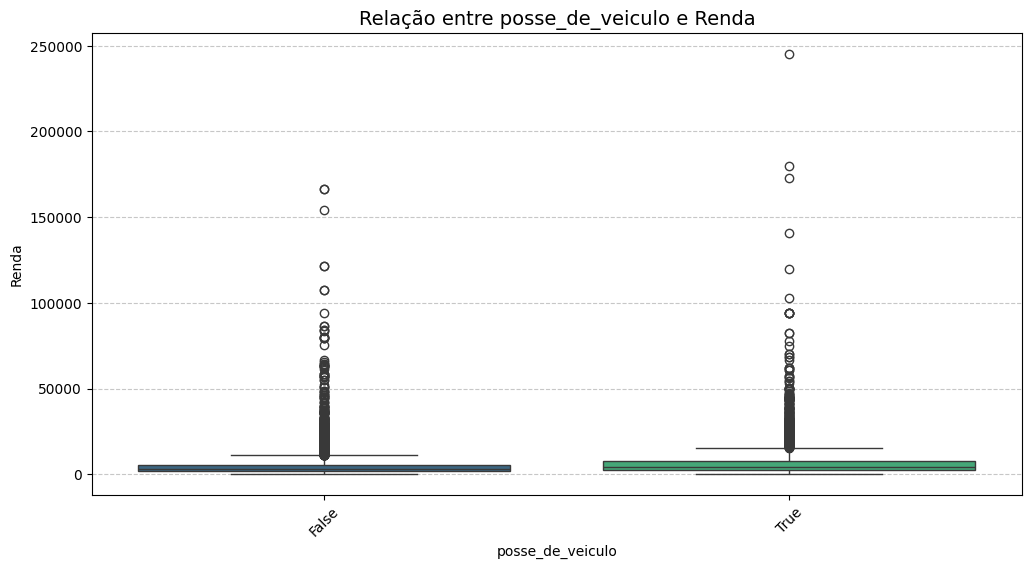

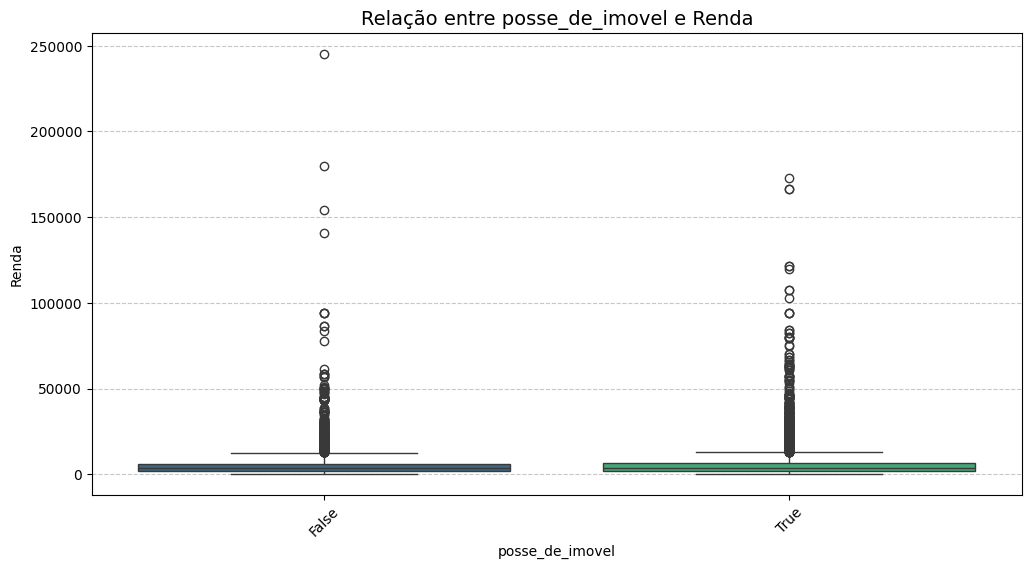

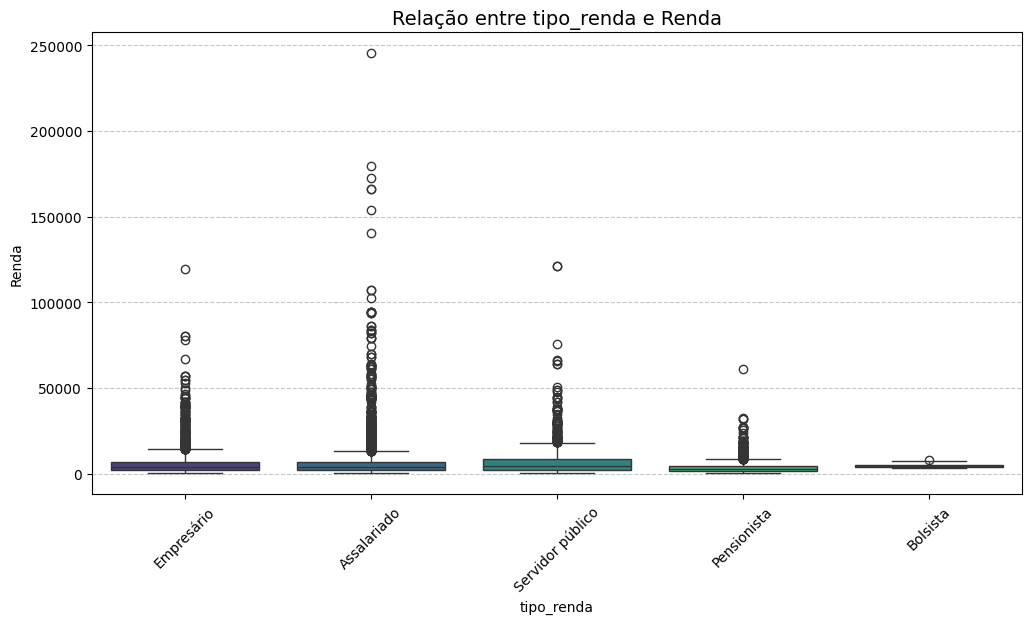

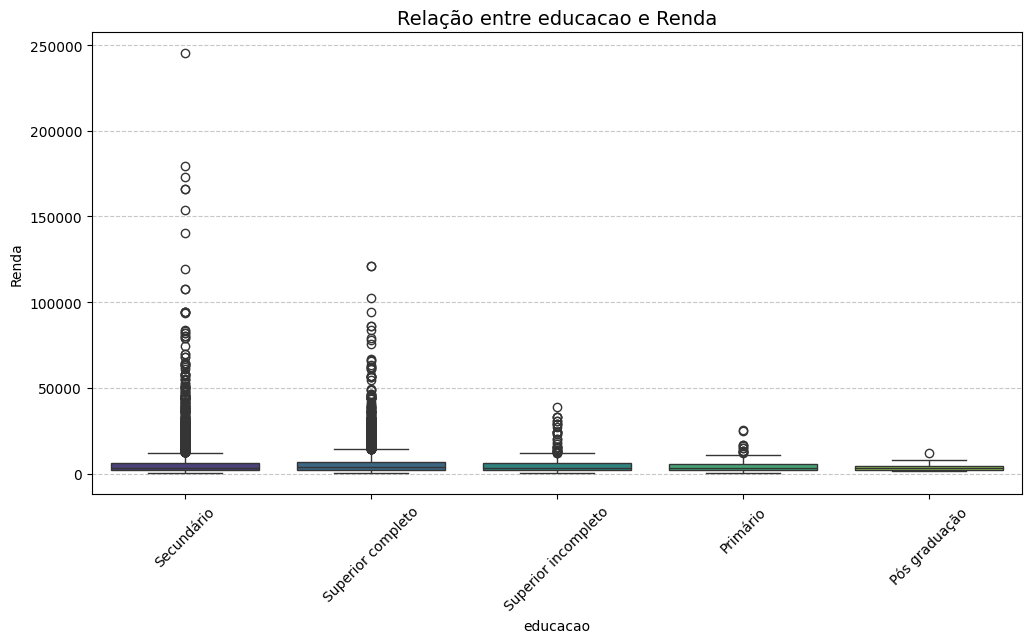

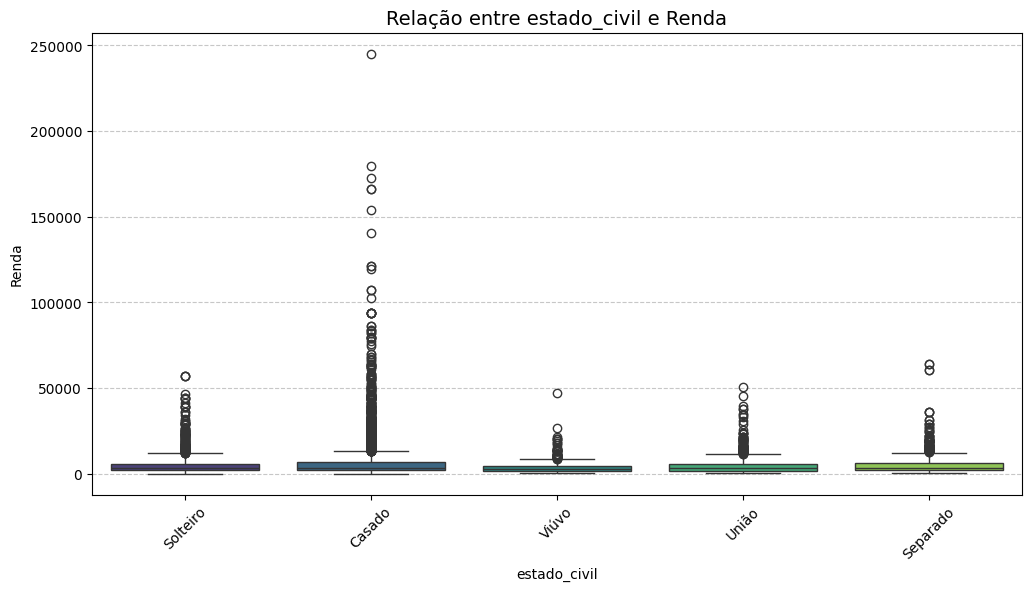

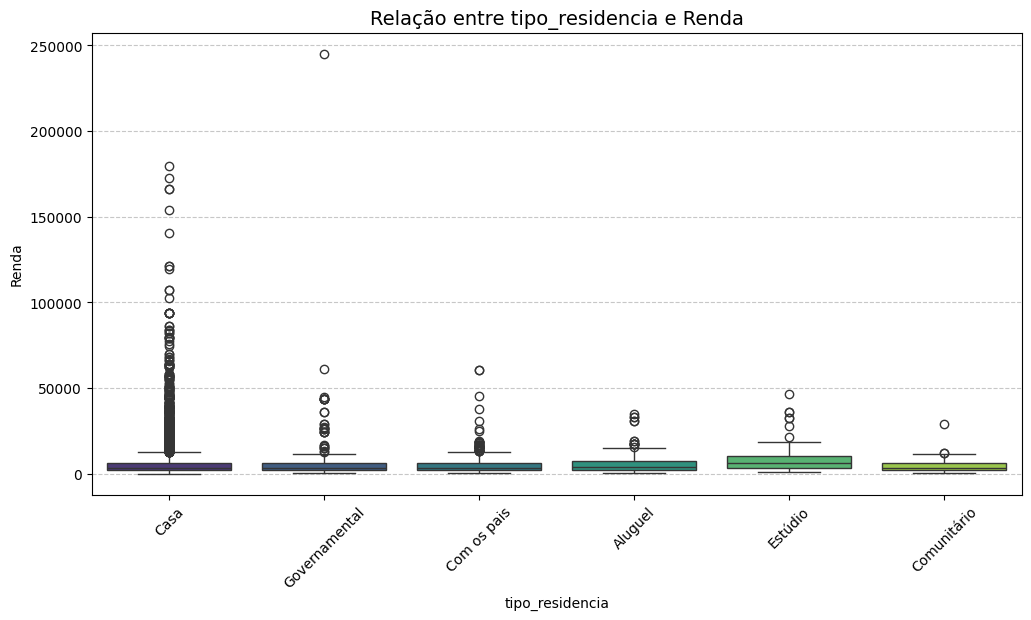

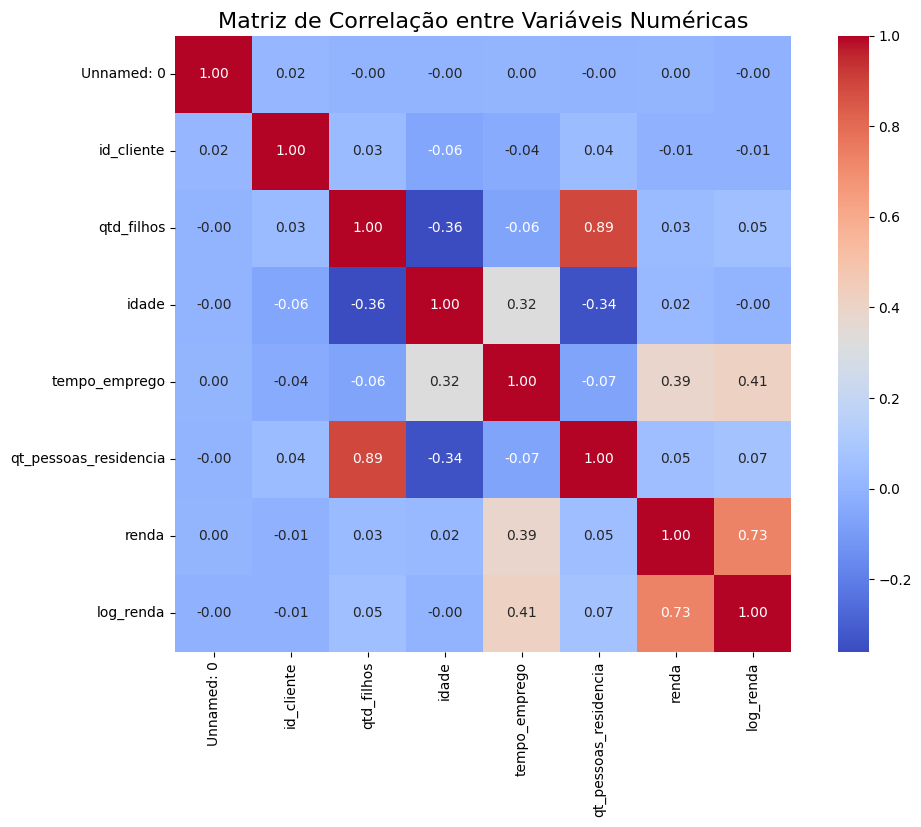

In [13]:
# Variáveis categóricas e numéricas
variaveis_categoricas = renda.select_dtypes(include=['object', 'bool']).columns
variaveis_numericas = renda.select_dtypes(include=['int64', 'float64']).columns

# Análise de variáveis numéricas com a variável alvo 'renda'
for coluna in variaveis_numericas:
    if coluna != 'renda':  # Ignorar a variável alvo para comparar
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=renda, x=coluna, y='renda', alpha=0.5, color='blue')
        plt.title(f'Relação entre {coluna} e Renda', fontsize=14)
        plt.xlabel(coluna)
        plt.ylabel('Renda')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

# Análise de variáveis categóricas com a variável alvo 'renda'
for coluna in variaveis_categoricas:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=renda, x=coluna, y='renda', palette='viridis')
    plt.title(f'Relação entre {coluna} e Renda', fontsize=14)
    plt.xlabel(coluna)
    plt.ylabel('Renda')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Correlação entre variáveis numéricas
correlation_matrix = renda[variaveis_numericas].corr()

# Plotando o heatmap de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlação entre Variáveis Numéricas', fontsize=16)
plt.show()


Relação entre variáveis numéricas e a variável alvo renda:

Para cada variável numérica, um gráfico de dispersão é criado para visualizar como a variável está associada com a renda.

Relação entre variáveis categóricas e a variável alvo renda:

Para cada variável categórica, um boxplot é criado para observar a distribuição de renda em diferentes categorias.

Correlação entre variáveis numéricas:

A matriz de correlação é gerada para observar relações lineares entre variáveis numéricas.

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



1. Seleção

   Vamos eliminar as variáveis inuteis:

In [14]:
renda.drop(['id_cliente', 'Unnamed: 0', 'data_ref'], axis=1, inplace = True)

2. Limpeza

   Vamos tirar os dados faltantes para que não haja nenhum problema na construção e modelagem do modelo.

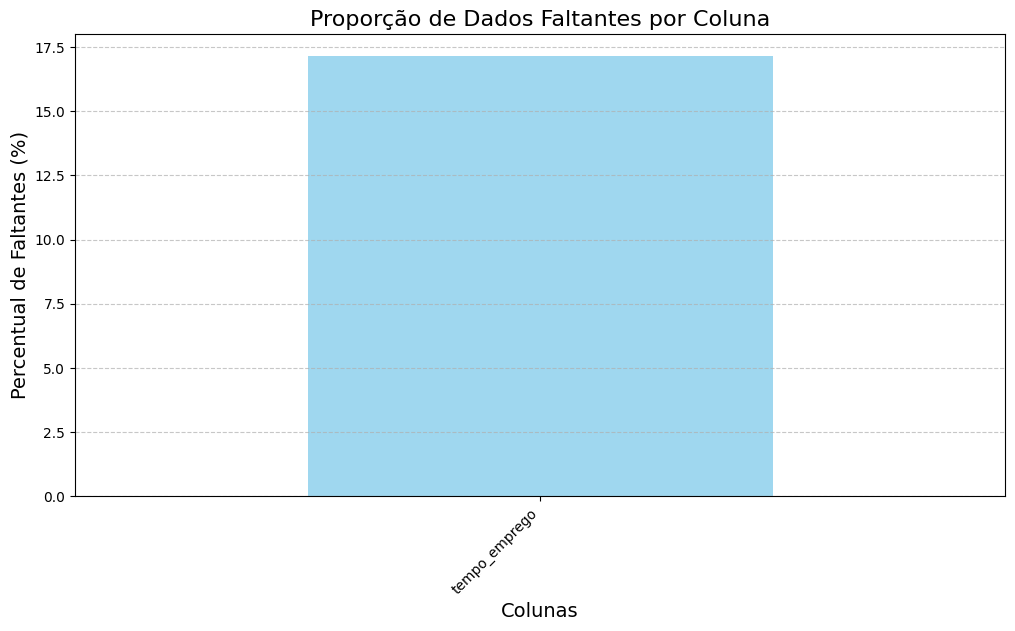

               faltantes  percentual_faltantes  não_faltantes    total
tempo_emprego     2573.0                 17.15        12427.0  15000.0


In [15]:
# Criando um dicionário para armazenar os dados faltantes
dados_faltantes_dict = {}

# Verificando se há dados faltantes
if renda.isna().any().sum() > 0:
    for col in renda.columns:
        if renda[col].isna().any():
            # Calculando métricas
            qnt = renda[col].isna().sum()
            total = len(renda)
            perc_faltantes = round((qnt / total) * 100, 2)

            # Adicionando ao dicionário
            dados_faltantes_dict[col] = {
                'faltantes': qnt,
                'percentual_faltantes': perc_faltantes,
                'não_faltantes': total - qnt,
                'total': total
            }
else:
    print('Não há dados faltantes.')

# Convertendo o dicionário em DataFrame e plotando
if dados_faltantes_dict:
    dados_faltantes = pd.DataFrame(dados_faltantes_dict).T
    
    # Plotando o gráfico de dados faltantes
    plt.figure(figsize=(12, 6))
    dados_faltantes['percentual_faltantes'].plot(kind='bar', color='skyblue', alpha=0.8)
    plt.title('Proporção de Dados Faltantes por Coluna', fontsize=16)
    plt.xlabel('Colunas', fontsize=14)
    plt.ylabel('Percentual de Faltantes (%)', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print('Nenhuma coluna com dados faltantes identificada.')

# Exibindo o DataFrame com as métricas
print(dados_faltantes)


In [19]:
renda.dropna(subset='tempo_emprego', inplace=True)

3. Construção

Esse código realiza pré-processamento de dados, transformando variáveis categóricas e booleanas em representações numéricas que podem ser usadas em modelos de Machine Learning. 

In [20]:
# Convertendo 'sexo' diretamente para valores numéricos
renda['sexo'] = renda['sexo'].replace({'M': 1, 'F': 0})

# Aplicando dummies às colunas categóricas, mantendo o mesmo efeito
renda_dummies = pd.get_dummies(renda, drop_first=False, dtype=int)

# Garantindo que as colunas booleanas sejam do tipo inteiro
for col in ['posse_de_veiculo', 'posse_de_imovel']:
    renda_dummies[col] = renda_dummies[col].astype(int)

Faremos também a padronização dos nomes das colunas no DataFrame renda_dummies. Transformaremos os nomes das colunas para letras minúsculas, substituiremos as caracteres especiais (como acentos) por suas versões simples, e convertemos espaços em underscores (_).

In [21]:
# Criando a lista de nomes de colunas
col = renda_dummies.columns.to_list()

# Usando list comprehension para realizar as transformações
col_lower = [
    i.lower()
    .replace('á', 'a')
    .replace('ã', 'a')
    .replace('ú', 'u')
    .replace('ó', 'o')
    .replace(' ', '_')
    for i in col
]

# Substituindo os nomes das colunas no DataFrame
renda_dummies.columns = col_lower

Com os dados tratados, vamos separar a base entre treino e teste:

In [24]:
# Separando as features (X) e a variável alvo (y)
X = renda_dummies.loc[:, renda_dummies.columns != 'renda']
y = renda_dummies['renda']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=100, shuffle=True
)

# Combinando X_train e y_train em um único DataFrame para a regularização LASSO
Xy_train = X_train.copy()
Xy_train['renda'] = y_train

Com isso, podemos moldar o modelo:

In [25]:
# Definindo o modelo com OLS
md = smf.ols(
    '''np.log(renda) ~
        sexo +
        posse_de_veiculo + 
        qtd_filhos + 
        tipo_renda_assalariado + tipo_renda_bolsista + tipo_renda_empresario + 
        tipo_renda_pensionista + tipo_renda_servidor_publico +
        educacao_primario + educacao_pos_graduaçao + educacao_secundario + 
        educacao_superior_completo + educacao_superior_incompleto +
        estado_civil_casado + estado_civil_separado + estado_civil_solteiro + 
        estado_civil_uniao + estado_civil_viuvo +
        tipo_residencia_aluguel + tipo_residencia_casa + tipo_residencia_com_os_pais + 
        tipo_residencia_comunitario + tipo_residencia_estudio + 
        tipo_residencia_governamental +
        idade + 
        tempo_emprego + 
        qt_pessoas_residencia
    ''', 
    data=Xy_train
)

# Lista de valores de alpha para regularização
alphas = [0, 0.001, 0.0025, 0.005, 0.01, 0.025, 0.05, 0.1]

# Inicializando dicionários para armazenar métricas
metrics_lasso = {
    'alpha': [],
    'MSE': [],
    'R²': [],
    'Adj. R²': [],
    'AIC': [],
    'BIC': []
}

# Loop sobre valores de alpha
for alpha in alphas:
    # Ajustando o modelo com regularização Elastic Net (LASSO com L1_wt=1)
    reg = md.fit_regularized(method='elastic_net', refit=True, L1_wt=1, alpha=alpha)

    # Predições no conjunto de teste (aplicando exp para reverter log transform)
    y_pred = np.exp(reg.predict(X_test))

    # Calculando o erro quadrático médio (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Salvando métricas no dicionário
    metrics_lasso['alpha'].append(alpha)
    metrics_lasso['MSE'].append(mse)
    metrics_lasso['R²'].append(round(reg.rsquared, 3))
    metrics_lasso['Adj. R²'].append(round(reg.rsquared_adj, 3))
    metrics_lasso['AIC'].append(round(reg.aic, 3))
    metrics_lasso['BIC'].append(round(reg.bic, 3))

    # Exibindo resumo do modelo e métricas
    print(f'\n\nAlpha = {alpha}')
    print(f'MSE: {mse:.3f}')
    print(reg.summary())

# Convertendo as métricas para DataFrame para análise
metrics_df = pd.DataFrame(metrics_lasso)
print(metrics_df)



Alpha = 0
MSE: 44094863.804
                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     180.7
Date:                Sat, 07 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:32:32   Log-Likelihood:                -10209.
No. Observations:                9320   AIC:                         2.048e+04
Df Residuals:                    9292   BIC:                         2.068e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

Com os dados gerados e manipulados, podemos separar em um dataframe, todos os parametros gerados:

In [28]:
# Criando o DataFrame com os parâmetros gerados pela regularização LASSO
parametros_lasso = pd.DataFrame({
    'Alpha': metrics_lasso['alpha'],          # Adicionando os valores de alpha
    'MSE': metrics_lasso['MSE'],             # Adicionando os MSE calculados
    'R²': metrics_lasso['R²'],               # Adicionando os valores de R²
    'Adj. R²': metrics_lasso['Adj. R²'],     # Adicionando os valores de R² ajustado
    'AIC': metrics_lasso['AIC'],             # Adicionando os valores de AIC
    'BIC': metrics_lasso['BIC']              # Adicionando os valores de BIC
})

# Exibindo o DataFrame com os resultados
parametros_lasso.reset_index(drop=True, inplace=True)  # Removendo índices desnecessários
print(parametros_lasso)


    Alpha           MSE     R²  Adj. R²        AIC        BIC
0  0.0000  4.409486e+07  0.352    0.351  20475.882  20682.940
1  0.0010  4.409115e+07  0.351    0.350  20466.152  20580.391
2  0.0025  4.398519e+07  0.351    0.350  20468.247  20561.066
3  0.0050  4.419547e+07  0.350    0.349  20476.735  20555.274
4  0.0100  4.456441e+07  0.346    0.346  20525.857  20575.836
5  0.0250  4.489196e+07  0.341    0.341  20586.128  20621.827
6  0.0500  4.489196e+07  0.341    0.341  20586.128  20621.827
7  0.1000  4.489196e+07  0.341    0.341  20586.128  20621.827


O modelo com o valor de alpha igual a 0.0025 apresenta os melhores parâmetros, pois possui o menor MSE e um dos maiores valores de R², além de apresentar um AIC mais baixo em comparação com os outros modelos testados.

In [29]:
# Definindo o modelo com OLS
md = smf.ols('''np.log(renda) ~
                sexo + 
                posse_de_veiculo + 
                qtd_filhos + 
                tipo_renda_assalariado + tipo_renda_bolsista + tipo_renda_empresario + 
                tipo_renda_pensionista + tipo_renda_servidor_publico +
                educacao_primario + educacao_pos_graduaçao + educacao_secundario + 
                educacao_superior_completo + educacao_superior_incompleto +
                estado_civil_casado + estado_civil_separado + estado_civil_solteiro + 
                estado_civil_uniao + estado_civil_viuvo +
                tipo_residencia_aluguel + tipo_residencia_casa + tipo_residencia_com_os_pais + 
                tipo_residencia_comunitario + tipo_residencia_estudio + 
                tipo_residencia_governamental +
                idade + 
                tempo_emprego + 
                qt_pessoas_residencia''', 
                data=Xy_train)

# Ajustando o modelo
reg = md.fit()

# Realizando predições e revertendo a transformação logarítmica
y_pred = np.exp(reg.predict(X_test))

# Calculando o erro quadrático médio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Exibindo MSE
print(f'\n\nMSE: {mse}')

# Resumo do modelo
print(reg.summary())




MSE: 44094863.80372495
                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     220.0
Date:                Sat, 07 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:41:33   Log-Likelihood:                -10209.
No. Observations:                9320   AIC:                         2.047e+04
Df Residuals:                    9296   BIC:                         2.064e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [31]:
var_significativa = ['sexo', 
                    'qtd_filhos', 
                    'tipo_renda_assalariado',
                    'tipo_renda_servidor_publico',
                    'educacao_secundario',
                    'educacao_superior_incompleto',
                    'estado_civil_casado',
                    'estado_civil_solteiro',
                    'idade',
                    'tempo_emprego',
                    'qt_pessoas_residencia',
                    'renda'
                    ]
renda_significativa = renda_dummies[var_significativa]
renda_significativa.head()

,sexo,qtd_filhos,tipo_renda_assalariado,tipo_renda_servidor_publico,educacao_secundario,educacao_superior_incompleto,estado_civil_casado,estado_civil_solteiro,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,0,0,0,1,0,0,1,26,6.602740,1.0,8060.34
1,1,0,1,0,0,0,1,0,28,7.183562,2.0,1852.15
2,0,0,0,0,0,0,1,0,35,0.838356,2.0,2253.89
3,0,1,0,1,0,0,1,0,30,4.846575,3.0,6600.77
4,1,0,1,0,1,0,0,1,33,4.293151,1.0,6475.97


In [32]:
# Separando as variáveis independentes (X) e dependente (y)
X = renda_significativa.loc[:, renda_significativa.columns != 'renda']
y = renda_significativa['renda']

# Dividindo os dados em treino e teste com a função `train_test_split`
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=150, shuffle=True
)

# Exibindo os tamanhos dos conjuntos de treino e teste
print(f'Tamanho do conjunto de treino: {X_train.shape[0]} amostras')
print(f'Tamanho do conjunto de teste: {X_test.shape[0]} amostras')

Tamanho do conjunto de treino: 8698 amostras
Tamanho do conjunto de teste: 3729 amostras


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


Para a técnica de modelagem, iremos usar a árvore geradora.

In [33]:
tree_simple = DecisionTreeRegressor(random_state=140)

### Rodando o modelo


In [34]:
tree_simple.fit(X_train, y_train)

DecisionTreeRegressor(random_state=140)

In [37]:
pd.set_option('float_format', '{:.3f}'.format)

index=['r_squared', 'mean_absolute_error', 'root_mean_squared_error']

hiperpametros_simple = pd.DataFrame({'conjunto_treino_simple': r2_score(y_train, tree_simple.predict(X_train))}, index= index)
hiperpametros_simple.loc['mean_absolute_error', 'conjunto_treino_simple'] = mean_absolute_error(y_train, tree_simple.predict(X_train))
hiperpametros_simple.loc['root_mean_squared_error', 'conjunto_treino_simple'] = mean_squared_error(y_train, tree_simple.predict(X_train)) ** 0.5
hiperpametros_simple['conjunto_teste_simple'] = r2_score(y_test, tree_simple.predict(X_test))
hiperpametros_simple.loc['mean_absolute_error','conjunto_teste_simple'] = mean_absolute_error(y_test, tree_simple.predict(X_test))
hiperpametros_simple.loc['root_mean_squared_error', 'conjunto_teste_simple'] = mean_squared_error(y_test, tree_simple.predict(X_test)) ** 0.5

hiperpametros_simple

,conjunto_treino_simple,conjunto_teste_simple
r_squared,0.821,0.221
mean_absolute_error,1492.571,3196.674
root_mean_squared_error,3856.857,7332.570


Esse código tem como objetivo calcular e armazenar as métricas de avaliação de um modelo, no caso, um modelo de árvore de decisão (tree_simple). As métricas são calculadas para dois conjuntos: o de treino (X_train, y_train) e o de teste (X_test, y_test).

In [38]:
rsqr = []
ind_i = []
ind_j = []

for i in range(2, 13):
    for j in range(2, 12):
        tree = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        tree.fit(X_train, y_train)
        rsq = tree.score(X_test, y_test)
        rsqr.append(rsq)
        ind_i.append(i)
        ind_j.append(j)
        
df_rsqr = pd.DataFrame({'r_quadrado':rsqr, 
                        'Profundidade':ind_i, 
                        'n_minimo_obs_folhas':ind_j}
                       )

plt.figure(figsize=(10,6))
plt.title('Seleção dos hiperparametros do modelo:\n')
sns.heatmap(df_rsqr.pivot(index='Profundidade',
                          columns='n_minimo_obs_folhas',
                          values='r_quadrado'),
            cmap='crest',
            annot=True
            )
plt.xlabel('Número mínimo obs por folha \n\n O valor de R quadrado se encontra no interior de cada célula')

Text(0.5, 36.72222222222221, 'Número mínimo obs por folha \n\n O valor de R quadrado se encontra no interior de cada célula')

Esse código realiza uma análise de sensibilidade dos hiperparâmetros max_depth (profundidade máxima da árvore) e min_samples_leaf (número mínimo de amostras por folha) em um modelo de regressão de árvore de decisão (DecisionTreeRegressor).

In [39]:
tree = DecisionTreeRegressor(max_depth=4, min_samples_leaf=2, random_state=140)

In [40]:
tree = tree.fit(X_train, y_train)

In [41]:
index=['r_squared', 'mean_absolute_error', 'root_mean_squared_error']

hiperpametros = pd.DataFrame({'conjunto_treino': r2_score(y_train, tree.predict(X_train))}, index= index)
hiperpametros.loc['mean_absolute_error', 'conjunto_treino'] = mean_absolute_error(y_train, tree.predict(X_train))
hiperpametros.loc['root_mean_squared_error', 'conjunto_treino'] = mean_squared_error(y_train, tree.predict(X_train)) ** 0.5
hiperpametros['conjunto_teste'] = r2_score(y_test, tree.predict(X_test))
hiperpametros.loc['mean_absolute_error','conjunto_teste'] = mean_absolute_error(y_test, tree.predict(X_test))
hiperpametros.loc['root_mean_squared_error', 'conjunto_teste'] = mean_squared_error(y_test, tree.predict(X_test)) ** 0.5

hiperpametros

,conjunto_treino,conjunto_teste
r_squared,0.484,0.427
mean_absolute_error,3443.028,3411.293
root_mean_squared_error,6555.994,6288.597


## Etapa 5 Crisp-DM: Avaliação dos resultados


In [42]:
hiperpametros

,conjunto_treino,conjunto_teste
r_squared,0.484,0.427
mean_absolute_error,3443.028,3411.293
root_mean_squared_error,6555.994,6288.597


Com base nos dados obtidos, observa-se que os valores de R² para os conjuntos de treino e teste são bastante próximos, o que indica que o modelo está generalizando bem para novos dados. Esse comportamento sugere que o modelo não está sofrendo de overfitting (ajuste excessivo aos dados de treino), pois ele é capaz de manter um desempenho consistente ao ser aplicado ao conjunto de teste, que simula dados desconhecidos.

Quando os resultados para os conjuntos de treino e teste são similares, isso indica que o modelo não está apenas memorizando os dados de treino, mas sim aprendendo padrões que são aplicáveis também a dados não vistos. Esse comportamento mais homogêneo é desejável, pois reflete uma boa capacidade preditiva do modelo, garantindo que ele seja eficaz tanto nos dados de treino quanto nos dados reais, representados pelo conjunto de teste. Isso demonstra a robustez do modelo para realizar previsões de forma confiável.

De acordo com os resultados apresentados no DataFrame, o coeficiente de determinação, ou R², explica aproximadamente 48% da variabilidade dos dados previstos para o conjunto de treino, enquanto para o conjunto de teste essa explicação é de cerca de 42%. Isso indica que, embora o modelo seja capaz de capturar uma parte significativa da variabilidade dos dados, há espaço para melhorar a explicação da variabilidade nos dados de teste.

Em relação ao erro absoluto médio (MAE), que representa a média da diferença absoluta entre os valores reais e previstos, observamos que a previsão da renda sofre uma variação de cerca de 3.400 unidades para mais ou para menos, tanto no conjunto de treino quanto no conjunto de teste. Isso sugere que, em média, a previsão do modelo está errando em torno desse valor, o que é uma métrica útil para entender o quão próximo o modelo está dos valores reais.

O erro quadrático médio (MSE) reflete a média dos erros ao quadrado e penaliza mais fortemente os erros maiores. Para fornecer uma interpretação mais intuitiva, calculamos a raiz do MSE, resultando na métrica RMSE (Root Mean Squared Error), que oferece uma medida mais direta do erro do modelo. Com o conjunto de treino apresentando um erro de cerca de 6.500 unidades e o conjunto de teste com um erro de aproximadamente 6.200, o RMSE indica que o modelo está cometendo erros significativos, especialmente quando há valores atípicos (outliers).

Finalmente, os hiperparâmetros do modelo foram ajustados de forma a otimizar as métricas de desempenho, buscando a configuração que proporcionasse os melhores resultados possíveis, tanto para o conjunto de treino quanto para o conjunto de teste.

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

A previsão de renda é comumente utilizada por instituições financeiras para determinar itens como limite de crédito, valor do empréstimo e outras variáveis associadas. A função abaixo classifica o limite de crédito, tipo de cartão e valor do empréstimo com base na renda prevista de cada cliente.

Vale ressaltar que esses parâmetros são, na prática, definidos levando em consideração diversas outras variáveis, como a relação com outras instituições financeiras, histórico de inadimplência, posse de bens e outras informações relevantes. Contudo, para efeitos de visualização, foi considerada apenas a variável renda.

O cálculo do valor do empréstimo foi realizado com base na renda prevista, levando em conta a possibilidade de parcelamento em 24 vezes. O valor de cada parcela foi limitado a cerca de 30% da renda total prevista, o que resulta no montante total do empréstimo.

In [45]:
def prever_renda(df: pd.DataFrame):
    renda_prevista = list(tree.predict(df))
    df_renda = []
    for i in renda_prevista:
        if i <= 2500:
            dic = {'renda_prevista': i, 'limite_de_credito': 3000, 'classe_cartao': 'standard', 'emprestimo_concedido': 18000}
            df_renda.append(dic)
        elif i <= 5000:
            dic = {'renda_prevista': i, 'limite_de_credito': 6000, 'classe_cartao': 'gold', 'emprestimo_concedido': 36000}
            df_renda.append(dic)
        elif i <= 7500:
            dic = {'renda_prevista': i, 'limite_de_credito': 8500, 'classe_cartao': 'platinum', 'emprestimo_concedido': 54000}
            df_renda.append(dic)
        elif i <= 10000:
            dic = {'renda_prevista': i, 'limite_de_credito': 15000, 'classe_cartao': 'black', 'emprestimo_concedido': 72000}
            df_renda.append(dic)
        elif i <= 15000:
            dic = {'renda_prevista': i, 'limite_de_credito': 20000, 'classe_cartao': 'black', 'emprestimo_concedido': 100000}
            df_renda.append(dic)
        elif i > 15000:
            dic = {'renda_prevista': i, 'limite_de_credito': 'ilimitado', 'classe_cartao': 'black', 'emprestimo_concedido': 150000}
            df_renda.append(dic)
        
    df_renda = pd.DataFrame(df_renda)
    return df_renda.sample(15)

In [46]:
prever_renda(X_test)

,renda_prevista,limite_de_credito,classe_cartao,emprestimo_concedido
2466,3521.751,6000,gold,36000
1137,3521.751,6000,gold,36000
1626,2816.735,6000,gold,36000
1127,3521.751,6000,gold,36000
1248,2816.735,6000,gold,36000
998,10744.084,20000,black,100000
2652,15802.013,ilimitado,black,150000
2759,2816.735,6000,gold,36000
1643,15802.013,ilimitado,black,150000
2094,4827.253,6000,gold,36000


Assim, o modelo se revela eficaz ao realizar previsões da renda média dos clientes com base nos atributos selecionados. Ele pode ser aplicado em diversas situações, como ilustrado no exemplo acima, onde foram de maneira sucinta atribuídos o limite de crédito, a classe do cartão e o valor do empréstimo concedido.